In [23]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
kaggle_df = pd.read_csv("/Users/ogulcan/Desktop/Spotify_Project/spotify_data.csv")
kaggle_df = kaggle_df.drop(['Unnamed: 0'],axis=1)
kaggle_df

In [17]:
from spotipy import Spotify
from spotipy.oauth2 import SpotifyOAuth

CLIENT_ID = ''
CLIENT_SECRET = ''
REDIRECT_URI = ''

scope = ["user-library-read", "playlist-read-private"]

sp = Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID,
                                       client_secret=CLIENT_SECRET,
                                       redirect_uri=REDIRECT_URI,
                                       scope=scope),
             requests_timeout=30)

# Kullanıcı bilgilerini yazdır (kontrol amaçlı)
user = sp.current_user()
print(user["display_name"], "-", user["id"])


Oğulcan - ...


In [18]:
token_info = sp.auth_manager.get_cached_token()
if token_info:
    access_token = token_info['access_token']
    print("Access Token:", access_token)
else:
    print("Token bulunamadı.")


Access Token: BQDnkLNz3Yn1Ban60ak2yP8OYa1rAvE1RahrNVeee_DoD4hg2EBIXGkKOoPoaCnZsS1miVZxZqAbNdDKYTNTNwnkCfukOh-YdF_sTwHKc_IOZBe1_egSh0i3Jm23-Ge7mBlRPUdqNW8Fzsu3teOHl2U5EcLRRTwl_1aOc4izD6PdhiJSRR6mureThzXLG14mtiY-f0ILDnYtgtu3dE47wK8PqrFEqvL-YhR70SgdLrFstt16RdGGAceKIPtVM-9-6Q


In [19]:
# Playlist ID'yi buraya gir
playlist_id = "6W57V9nC35ul5GRg2J5y29"

# Playlist’ten tüm şarkıları al
def get_all_tracks(sp, playlist_id):
    tracks = []
    results = sp.playlist_tracks(playlist_id, limit=100, offset=0)
    tracks.extend(results['items'])
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Her şarkının audio feature'larını al
def get_audio_features(sp, track_ids):
    features = []
    for i in range(0, len(track_ids), 50):
        batch = track_ids[i:i+50]
        try:
            audio_features = sp.audio_features(batch)
            features.extend([f for f in audio_features if f is not None])
            time.sleep(0.2)
        except spotipy.exceptions.SpotifyException as e:
            print(f"API hatası: {e}")
            continue
    return features

# 1. Şarkıları al
tracks_data = get_all_tracks(sp, playlist_id)
track_ids = [item['track']['id'] for item in tracks_data if item['track']]

# 2. Audio feature'ları al
features_data = get_audio_features(sp, track_ids)

# 3. DataFrame'e dönüştür
df_features = pd.DataFrame(features_data)

# 4. Track isimlerini ekle
track_names = [item['track']['name'] for item in tracks_data if item['track']]
df_features['track_name'] = track_names

# Sonuç
df_features



HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4qKcDkK6siZ7Jp1Jb4m0aL,6T8cJz5lAqGer9GUHGyelE,0gV5B7zmJkS1aaH9APokrH,5S1IUPueD0xE0vj4zU3nSf,46gjYTEK7W8ZTABcglGP2f,3dgQqOiQ9fCKVhNOedd2lf,62vpWI1CHwFy7tMIcSStl8,2Vx8E3K5icPZR7OCklWBXX,7p7pzSVr2zovan3m1m5hFm,0bAkKNCQfWkexHFn7fIKns,7rC5Pl8rQSX4myONQHYPBK,5R691ipUYRDYW6ehapjoj6,4XoP1AkbOurU9CeZ2rMEz2,2xLMifQCjDGFmkHkpNLD9h,6OaVWaGfhXn70ZJfdVcabn,1xYpVRspgaLxdJLOTQkTjg,6Ius4TC0L3cN74HT7ENE6e,4KYS9GK68yeuUJ8vJfPxrq,6gBFPUFcJLzWGx4lenP6h2,5e574bhjycX1eH2l4Auage,04MLEeAMuV9IlHEsD8vF6A,1AqemxWsT0iGg5Lvkm16Bt,2IRZnDFmlqMuOrYOLnZZyc,6MWtB6iiXyIwun0YzU6DFP,1rlIrbWboTRGeKfHhgbJRZ,7floNISpH8VF4z4459Qo18,5tFep7dXGd7vEJ668wTPux,2JvzF1RMd7lE3KmFlsyZD8,1knDG6hRiyjs3d7tG4GJ2Z,79XrkTOfV1AqySNjVlygpW,7DcvwMAiqKJQD1rrdfxSDx,4k2l5T9ulYdnlQzlmzSqUI,5ry2OE6R2zPQFDO85XkgRb,6UjfByV1lDLW0SOVQA4NAi,5cXg9IQS34FzLVdHhp7hu7,6MF4tRr5lU8qok8IKaFOBE,7ycWLEP1GsNjVvcjawXz3z,2jTujnt0y344ai1rNOywgr,2hyF1YWdX8yxExvRelT9nB,7KZ5MMVgBVox9ycroB2UrI,2cYqizR4lgv

API hatası: http status: 403, code: -1 - https://api.spotify.com/v1/audio-features/?ids=4qKcDkK6siZ7Jp1Jb4m0aL,6T8cJz5lAqGer9GUHGyelE,0gV5B7zmJkS1aaH9APokrH,5S1IUPueD0xE0vj4zU3nSf,46gjYTEK7W8ZTABcglGP2f,3dgQqOiQ9fCKVhNOedd2lf,62vpWI1CHwFy7tMIcSStl8,2Vx8E3K5icPZR7OCklWBXX,7p7pzSVr2zovan3m1m5hFm,0bAkKNCQfWkexHFn7fIKns,7rC5Pl8rQSX4myONQHYPBK,5R691ipUYRDYW6ehapjoj6,4XoP1AkbOurU9CeZ2rMEz2,2xLMifQCjDGFmkHkpNLD9h,6OaVWaGfhXn70ZJfdVcabn,1xYpVRspgaLxdJLOTQkTjg,6Ius4TC0L3cN74HT7ENE6e,4KYS9GK68yeuUJ8vJfPxrq,6gBFPUFcJLzWGx4lenP6h2,5e574bhjycX1eH2l4Auage,04MLEeAMuV9IlHEsD8vF6A,1AqemxWsT0iGg5Lvkm16Bt,2IRZnDFmlqMuOrYOLnZZyc,6MWtB6iiXyIwun0YzU6DFP,1rlIrbWboTRGeKfHhgbJRZ,7floNISpH8VF4z4459Qo18,5tFep7dXGd7vEJ668wTPux,2JvzF1RMd7lE3KmFlsyZD8,1knDG6hRiyjs3d7tG4GJ2Z,79XrkTOfV1AqySNjVlygpW,7DcvwMAiqKJQD1rrdfxSDx,4k2l5T9ulYdnlQzlmzSqUI,5ry2OE6R2zPQFDO85XkgRb,6UjfByV1lDLW0SOVQA4NAi,5cXg9IQS34FzLVdHhp7hu7,6MF4tRr5lU8qok8IKaFOBE,7ycWLEP1GsNjVvcjawXz3z,2jTujnt0y344ai1rNOywgr,2hyF1YWdX8yxExvRelT9nB,7KZ5MMVgBVox9yc

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3yaYgjEFkRw3PVjW9mV1TO,2tUL6dZf1mywCj5WvCPZw6,40iJIUlhi6renaREYGeIDS,7F9cT6hIRhnFCYP6GKS0tf,3i952xMg7getPjzoOukIWh,1XKTvkeaZy5gueNNZYL7rE,6c5wQFfJApRMooKE7UQnlH,2oFdrFpXDgPcszmfWaKboI,4R67rQNSbbsR4TdUVOIdez,08F16baYbciTva9P4BvpiI,3szf2z1Cy1QMrtHrbn8rz9,1dUHF4RyMmMTveJ0Rby6Xm,6jy9yJfgCsMHdu2Oz4BGKX,6WSBZroxQaO3FYEpT2ACFH,4D1eVq5AUILwjg3tAe7o6M,0UTyLmkQgPOEIz95OVAJTR,30KctD1WsHKTIYczXjip5a,6AshXllQhobwSXsdpgp41w,5W8jRrZ6tWrTrqnKRtIQBf,08LwMWf5Tcfsd752EPzFV0,7EulRO07ZgchxqKUHb8Pvc,4fHRUyNTNVD0HRe4YPYA4m,4WEuEfFiczWxblHyuucSBL,4nuAslShoN77tq12fzwjUq,6myUpr3GDR80Dg3zqNTmmG,3f2k8op0nWDoZM4pXim6wG,2cnKST6T9qUo2i907lm8zX,4KDNRh9Oor80z3XIxdWlui,4n6NDfYake476trCjJRNl0,7Bpx2vsWfQFBACRz4h3IqH,3iVcZ5G6tvkXZkZKlMpIUs,3qX1dqmDdmMvvfMVfsx4Bh,6PzDwzYlw2gH6pYFQqNnFA,0JEefF2thwTsgWE2Wv0IsC,5pQZullzXsixizZmBcmXhy,2lD6AoA8qf2t4Dkf2TcmNK,6rTInqW3YECMkQsBEHw4sd,69WMdZSqdQwFgLVpbMsZ2J,4o7sl87Ock4SGA8b3gRR2l,6OrTKLtcF7EBayOV2QqkSK,0N3W5peJUQt

API hatası: http status: 403, code: -1 - https://api.spotify.com/v1/audio-features/?ids=3yaYgjEFkRw3PVjW9mV1TO,2tUL6dZf1mywCj5WvCPZw6,40iJIUlhi6renaREYGeIDS,7F9cT6hIRhnFCYP6GKS0tf,3i952xMg7getPjzoOukIWh,1XKTvkeaZy5gueNNZYL7rE,6c5wQFfJApRMooKE7UQnlH,2oFdrFpXDgPcszmfWaKboI,4R67rQNSbbsR4TdUVOIdez,08F16baYbciTva9P4BvpiI,3szf2z1Cy1QMrtHrbn8rz9,1dUHF4RyMmMTveJ0Rby6Xm,6jy9yJfgCsMHdu2Oz4BGKX,6WSBZroxQaO3FYEpT2ACFH,4D1eVq5AUILwjg3tAe7o6M,0UTyLmkQgPOEIz95OVAJTR,30KctD1WsHKTIYczXjip5a,6AshXllQhobwSXsdpgp41w,5W8jRrZ6tWrTrqnKRtIQBf,08LwMWf5Tcfsd752EPzFV0,7EulRO07ZgchxqKUHb8Pvc,4fHRUyNTNVD0HRe4YPYA4m,4WEuEfFiczWxblHyuucSBL,4nuAslShoN77tq12fzwjUq,6myUpr3GDR80Dg3zqNTmmG,3f2k8op0nWDoZM4pXim6wG,2cnKST6T9qUo2i907lm8zX,4KDNRh9Oor80z3XIxdWlui,4n6NDfYake476trCjJRNl0,7Bpx2vsWfQFBACRz4h3IqH,3iVcZ5G6tvkXZkZKlMpIUs,3qX1dqmDdmMvvfMVfsx4Bh,6PzDwzYlw2gH6pYFQqNnFA,0JEefF2thwTsgWE2Wv0IsC,5pQZullzXsixizZmBcmXhy,2lD6AoA8qf2t4Dkf2TcmNK,6rTInqW3YECMkQsBEHw4sd,69WMdZSqdQwFgLVpbMsZ2J,4o7sl87Ock4SGA8b3gRR2l,6OrTKLtcF7EBayO

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=42VsgItocQwOQC3XWZ8JNA,0Fg88OWOdERXLMDcTWYwjf,5gFoAVTN9YlM9uJCrFZtgl,5BOBHIBuzvQuIYL1E1nDzl,6cmXX1EiigAAyvahpqfa4c,5wG3HvLhF6Y5KTGlK0IW3J,2yUzr8Sr6ldG8vmHhZwTnz,0fyP96TikhD9sM4eKqw5Yp,52eIcoLUM25zbQupAZYoFh,6TdFkofgTvN0WfnWFmh4a6,1PH2MDbcBAU094DlgTIND1,0xaFw2zDYf1rIJWl2dXiSF,29YW2xXlo6Pc6M0SBTCXYN,4m4BHvDfzIgj5LbQLuFiIp,4kjI1gwQZRKNDkw1nI475M,7wBJfHzpfI3032CSD7CE2m,6BJbOXDlgVAXSaq6wYFYT2,1m8WpLYXEiNVZchsWEcCSy,51RaJOy09JMFHyPaDgXxBO,0Mrnt1YqVuW2bqmwu4VxDt,2nibvvDdAQkVraYP00z2RS,2tudvzsrR56uom6smgOcSf,28drn6tQo95MRvO0jQEo5C,0hKtu53OlIFXVuYkZwcn3o,3OxL6MuctgZp1e0zxoAZhH,4e0uZkMYa8e8HJ5TEUN417,5RMTsrJkrtumtiIZjy7dL6,2mhdhTWqT8RhkTlN2yWZZi,70ToiXlzl8N1EgfC07ZcZE,0cGn4vxyoBftN61XUv2aQk,4Orf7Hvci6SZrPIoUjGuFY,350l5Tkctw6RMcIdl7MlaS,3eh51r6rFWAlGQRlHx9QnQ,177WEvlLsCc0FzCTWslawr,77DRzu7ERs0TX3roZcre7Q,1wFFFzJ5EsKbBWZriAcubN,6AI3ezQ4o3HUoP6Dhudph3,6Aj2H0Z0v0JgnSfPEwCgW0,4VnYL2m6J9kWrBSw22CXwx,16utyJfWZGkTWYDobMzND7,4nva9EpKntU

API hatası: http status: 403, code: -1 - https://api.spotify.com/v1/audio-features/?ids=42VsgItocQwOQC3XWZ8JNA,0Fg88OWOdERXLMDcTWYwjf,5gFoAVTN9YlM9uJCrFZtgl,5BOBHIBuzvQuIYL1E1nDzl,6cmXX1EiigAAyvahpqfa4c,5wG3HvLhF6Y5KTGlK0IW3J,2yUzr8Sr6ldG8vmHhZwTnz,0fyP96TikhD9sM4eKqw5Yp,52eIcoLUM25zbQupAZYoFh,6TdFkofgTvN0WfnWFmh4a6,1PH2MDbcBAU094DlgTIND1,0xaFw2zDYf1rIJWl2dXiSF,29YW2xXlo6Pc6M0SBTCXYN,4m4BHvDfzIgj5LbQLuFiIp,4kjI1gwQZRKNDkw1nI475M,7wBJfHzpfI3032CSD7CE2m,6BJbOXDlgVAXSaq6wYFYT2,1m8WpLYXEiNVZchsWEcCSy,51RaJOy09JMFHyPaDgXxBO,0Mrnt1YqVuW2bqmwu4VxDt,2nibvvDdAQkVraYP00z2RS,2tudvzsrR56uom6smgOcSf,28drn6tQo95MRvO0jQEo5C,0hKtu53OlIFXVuYkZwcn3o,3OxL6MuctgZp1e0zxoAZhH,4e0uZkMYa8e8HJ5TEUN417,5RMTsrJkrtumtiIZjy7dL6,2mhdhTWqT8RhkTlN2yWZZi,70ToiXlzl8N1EgfC07ZcZE,0cGn4vxyoBftN61XUv2aQk,4Orf7Hvci6SZrPIoUjGuFY,350l5Tkctw6RMcIdl7MlaS,3eh51r6rFWAlGQRlHx9QnQ,177WEvlLsCc0FzCTWslawr,77DRzu7ERs0TX3roZcre7Q,1wFFFzJ5EsKbBWZriAcubN,6AI3ezQ4o3HUoP6Dhudph3,6Aj2H0Z0v0JgnSfPEwCgW0,4VnYL2m6J9kWrBSw22CXwx,16utyJfWZGkTWYD

,track_name
0,Look Alive (feat. Drake)
1,God's Plan
2,Wow Freestyle (feat. Kendrick Lamar)
3,Bigger Than You (feat. Drake & Quavo)
4,Jumpman
...,...
346,FRIED
347,Sky
348,Rookie Of The Year
349,Livin' My Truth


In [20]:
# 1. Şarkı isimleriyle ID'leri alalım
track_ids = []
for track_name in df_features['track_name']:
    results = sp.search(q=track_name, limit=1)  # Her şarkıyı tek tek arıyoruz
    track_id = results['tracks']['items'][0]['id']  # Şarkı ID'sini alıyoruz
    track_ids.append(track_id)

# 2. Şarkı ID'lerini df_features'e ekleyelim
df_features['track_id'] = track_ids

# Kontrol etmek için ilk birkaç satırı görüntüleyelim
print(df_features.head())


                              track_name                track_id
0               Look Alive (feat. Drake)  6HJ34Zyw6bg8yGm28AxLXf
1                             God's Plan  5t9KtCfnu8wQui1G6IqqBR
2   Wow Freestyle (feat. Kendrick Lamar)  0gV5B7zmJkS1aaH9APokrH
3  Bigger Than You (feat. Drake & Quavo)  5S1IUPueD0xE0vj4zU3nSf
4                                Jumpman  27GmP9AWRs744SzKcpJsTZ


In [65]:
matched_df = pd.merge(df_features, kaggle_df, on='track_id', how='inner')
print(f"Eşleşen şarkı sayısı: {matched_df.shape[0]}")

# Eğer istersen eşleşmeyenleri de görelim
unmatched_df = df_features[~df_features['track_id'].isin(matched_df['track_id'])]
print(f"Eşleşmeyen şarkı sayısı: {unmatched_df.shape[0]}")



Eşleşen şarkı sayısı: 202
Eşleşmeyen şarkı sayısı: 149


In [66]:
matched_df

,track_name_x,track_id,artist_name,track_name_y,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Look Alive (feat. Drake),6HJ34Zyw6bg8yGm28AxLXf,BlocBoy JB,Look Alive (feat. Drake),72,2018,hip-hop,0.918,0.580,10,-7.501,1,0.3220,0.001080,0.000061,0.1060,0.6110,139.977,181415,4
1,Wow Freestyle (feat. Kendrick Lamar),0gV5B7zmJkS1aaH9APokrH,Jay Rock,Wow Freestyle (feat. Kendrick Lamar),68,2018,hip-hop,0.782,0.633,8,-4.644,1,0.3410,0.035500,0.000000,0.0615,0.7490,150.055,175213,4
2,Bigger Than You (feat. Drake & Quavo),5S1IUPueD0xE0vj4zU3nSf,2 Chainz,Bigger Than You (feat. Drake & Quavo),55,2018,hip-hop,0.888,0.515,1,-6.246,1,0.2710,0.247000,0.000000,0.4460,0.2640,141.009,225893,4
3,Jumpman,27GmP9AWRs744SzKcpJsTZ,Drake,Jumpman,70,2015,hip-hop,0.852,0.553,1,-7.286,1,0.1870,0.055900,0.000000,0.3320,0.6560,142.079,205879,4
4,No Role Modelz,68Dni7IE4VyPkTOH9mRWHr,J. Cole,No Role Modelz,87,2014,hip-hop,0.690,0.521,10,-8.492,0,0.3390,0.324000,0.000000,0.0534,0.4940,100.028,292799,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Willing To Trust (with Ty Dolla $ign),1OFQT3lHGbnn3x9jPtagXk,Kid Cudi,Willing To Trust (with Ty Dolla $ign),59,2022,hip-hop,0.601,0.738,0,-7.247,1,0.1800,0.011600,0.205000,0.3430,0.3130,78.003,282053,4
198,Sky,6VObnIkLVruX4UVyxWhlqm,Adele,Skyfall,76,2012,pop,0.346,0.552,0,-6.864,0,0.0282,0.417000,0.000000,0.1140,0.0789,75.881,286480,4
199,Rookie Of The Year,7aVjnFsARHuTBZzkR6rYOR,Moneybagg Yo,Rookie Of The Year,61,2021,hip-hop,0.881,0.529,11,-7.398,0,0.4220,0.000884,0.000167,0.1240,0.2230,87.996,120110,4
200,Livin' My Truth,37Qn9foJ2E2S24guZSyvyg,Kid Cudi,Livin' My Truth,59,2022,hip-hop,0.679,0.701,2,-6.638,1,0.0401,0.401000,0.058100,0.1380,0.9350,80.988,133507,4


In [ ]:
matched_df = matched_df.drop(["track_name_x"],axis=1)
matched_df

,track_id,artist_name,track_name_y,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6HJ34Zyw6bg8yGm28AxLXf,BlocBoy JB,Look Alive (feat. Drake),72,2018,hip-hop,0.918,0.580,10,-7.501,1,0.3220,0.001080,0.000061,0.1060,0.6110,139.977,181415,4
1,0gV5B7zmJkS1aaH9APokrH,Jay Rock,Wow Freestyle (feat. Kendrick Lamar),68,2018,hip-hop,0.782,0.633,8,-4.644,1,0.3410,0.035500,0.000000,0.0615,0.7490,150.055,175213,4
2,5S1IUPueD0xE0vj4zU3nSf,2 Chainz,Bigger Than You (feat. Drake & Quavo),55,2018,hip-hop,0.888,0.515,1,-6.246,1,0.2710,0.247000,0.000000,0.4460,0.2640,141.009,225893,4
3,27GmP9AWRs744SzKcpJsTZ,Drake,Jumpman,70,2015,hip-hop,0.852,0.553,1,-7.286,1,0.1870,0.055900,0.000000,0.3320,0.6560,142.079,205879,4
4,68Dni7IE4VyPkTOH9mRWHr,J. Cole,No Role Modelz,87,2014,hip-hop,0.690,0.521,10,-8.492,0,0.3390,0.324000,0.000000,0.0534,0.4940,100.028,292799,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1OFQT3lHGbnn3x9jPtagXk,Kid Cudi,Willing To Trust (with Ty Dolla $ign),59,2022,hip-hop,0.601,0.738,0,-7.247,1,0.1800,0.011600,0.205000,0.3430,0.3130,78.003,282053,4
198,6VObnIkLVruX4UVyxWhlqm,Adele,Skyfall,76,2012,pop,0.346,0.552,0,-6.864,0,0.0282,0.417000,0.000000,0.1140,0.0789,75.881,286480,4
199,7aVjnFsARHuTBZzkR6rYOR,Moneybagg Yo,Rookie Of The Year,61,2021,hip-hop,0.881,0.529,11,-7.398,0,0.4220,0.000884,0.000167,0.1240,0.2230,87.996,120110,4
200,37Qn9foJ2E2S24guZSyvyg,Kid Cudi,Livin' My Truth,59,2022,hip-hop,0.679,0.701,2,-6.638,1,0.0401,0.401000,0.058100,0.1380,0.9350,80.988,133507,4


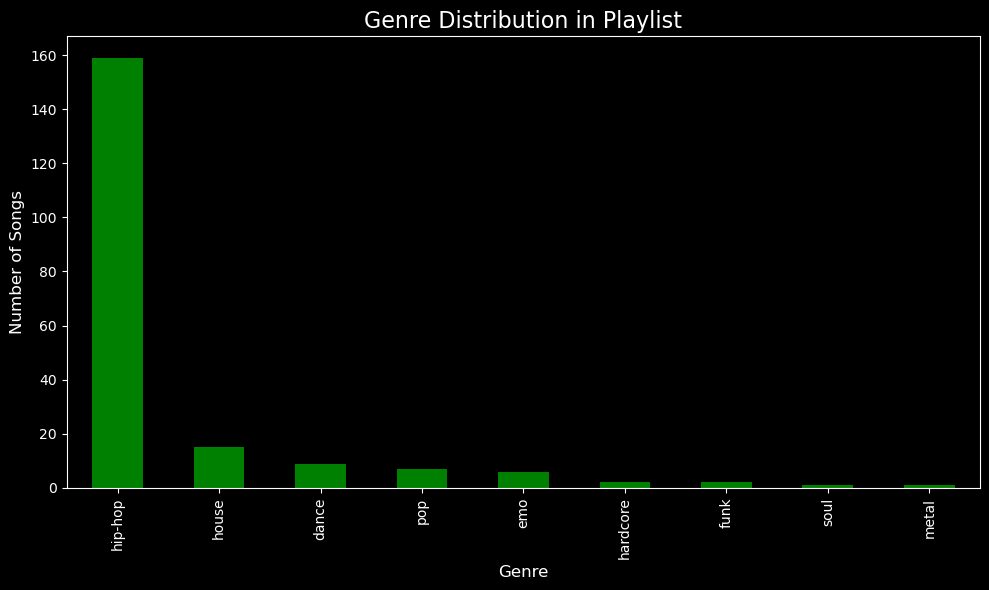

In [33]:
# Spotify tarzı tema
plt.style.use('dark_background')
genre_counts = matched_df['genre'].value_counts()


genre_counts.plot(kind='bar', color="green", figsize=(10, 6), title="Genre Distribution in Playlist",)
plt.title('Genre Distribution in Playlist', fontsize=16, color='white')
plt.xlabel("Genre", fontsize=12, color='white')
plt.ylabel('Number of Songs', fontsize=12, color='white')
plt.tick_params(colors='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


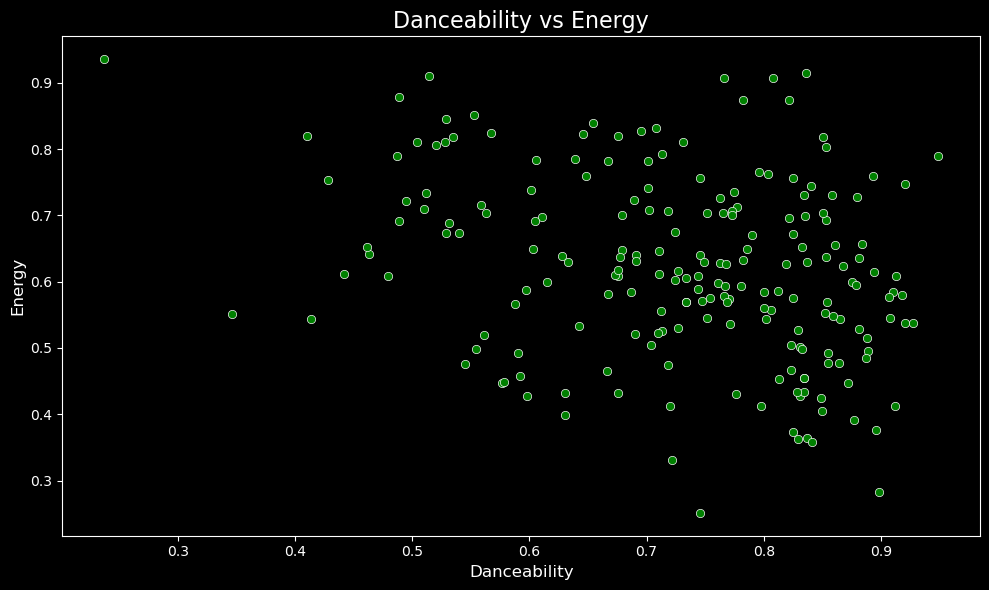

In [34]:
# Danceability vs Energy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=matched_df, x='danceability', y='energy', color='green')
plt.title('Danceability vs Energy', fontsize=16, color='white')
plt.xlabel('Danceability', fontsize=12, color='white')
plt.ylabel('Energy', fontsize=12, color='white')
plt.tick_params(colors='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


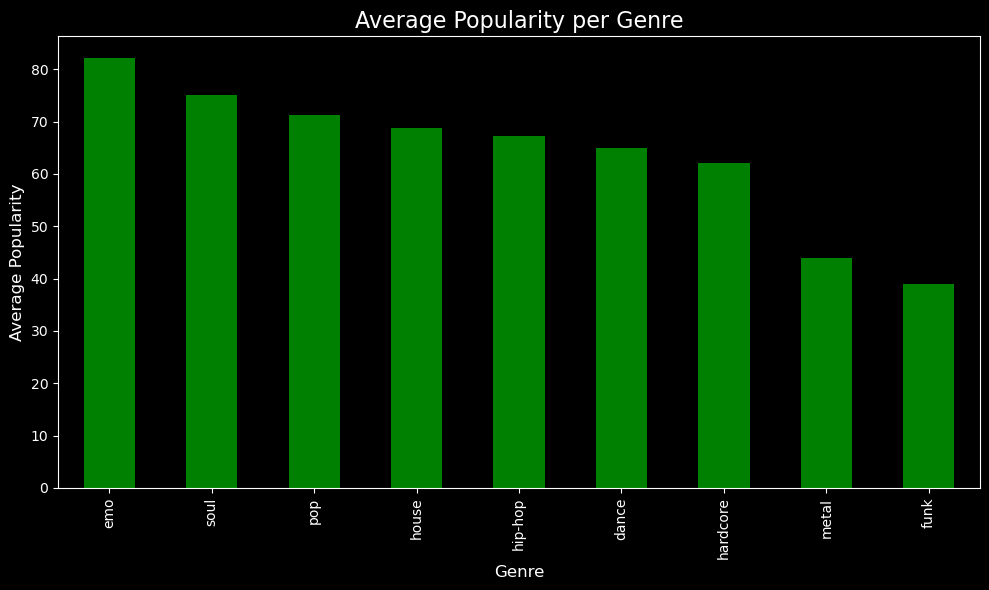

In [35]:
# Genre'lar ve ortalama popülerlik
genre_popularity = matched_df.groupby('genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_popularity.plot(kind='bar', color="green")
plt.title('Average Popularity per Genre', fontsize=16, color='white')
plt.xlabel('Genre', fontsize=12, color='white')
plt.ylabel('Average Popularity', fontsize=12, color='white')
plt.tick_params(colors='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


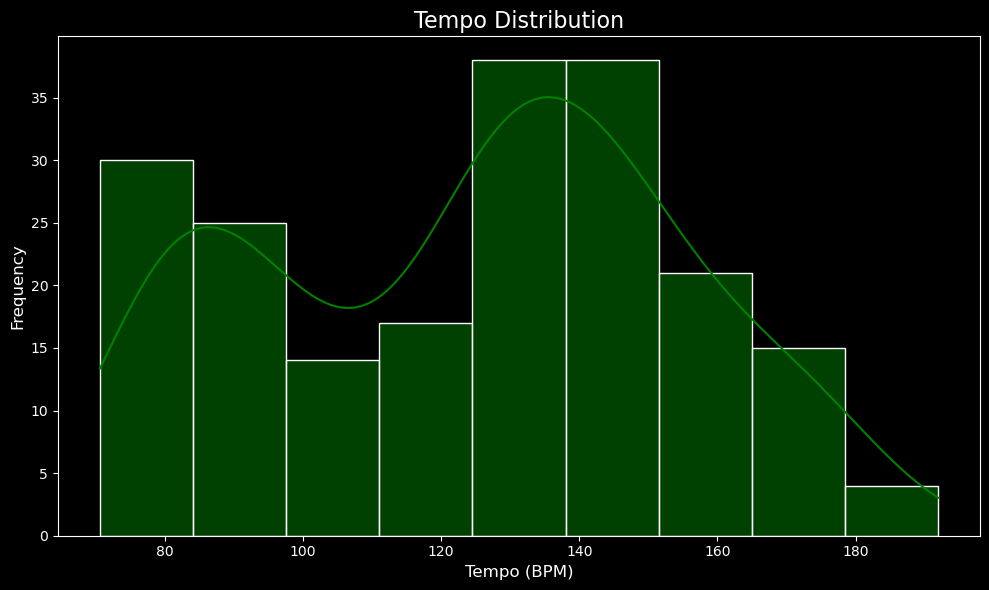

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(matched_df['tempo'], kde=True, color="green")
plt.title('Tempo Distribution', fontsize=16, color='white')
plt.xlabel('Tempo (BPM)', fontsize=12, color='white')
plt.ylabel('Frequency', fontsize=12, color='white')
plt.tick_params(colors='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


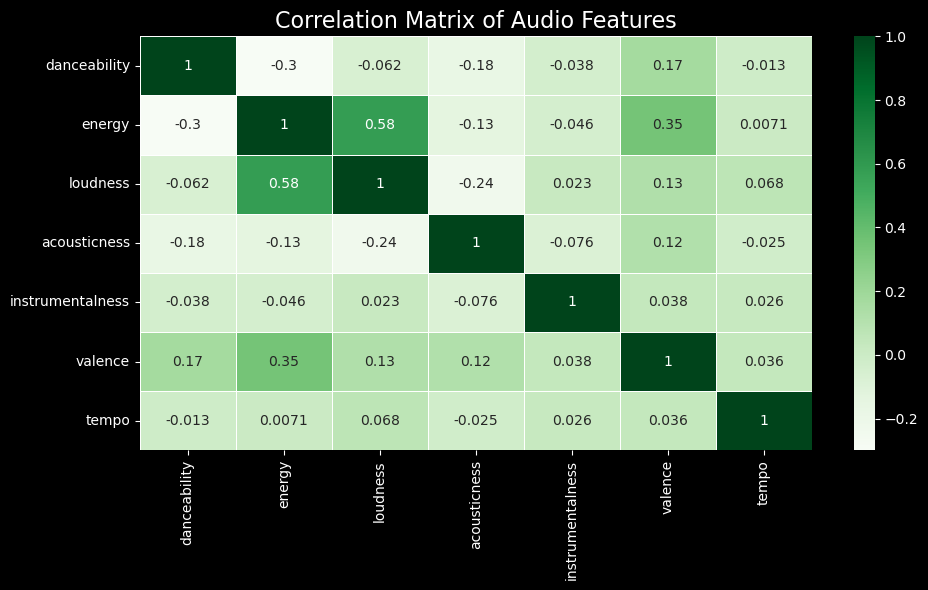

In [37]:
# Korelasyon matrisini hesapla
corr_matrix = matched_df[['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', linewidths=0.5, cbar=True, annot_kws={'size': 10})
plt.title('Correlation Matrix of Audio Features', fontsize=16, color='white')
plt.tick_params(colors='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


/var/folders/jl/m9thb3l97_14j8thlylmz5v40000gn/T/ipykernel_2183/3613890772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='time_signature', data=matched_df, palette='Greens')


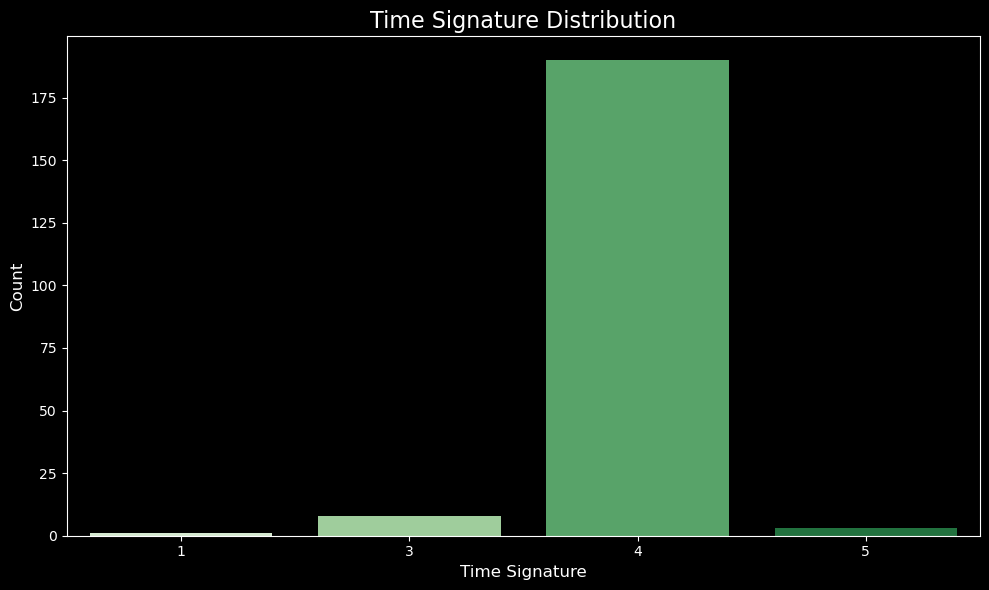

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='time_signature', data=matched_df, palette='Greens')
plt.title('Time Signature Distribution', fontsize=16, color='white')
plt.xlabel('Time Signature', fontsize=12, color='white')
plt.ylabel('Count', fontsize=12, color='white')
plt.tick_params(colors='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


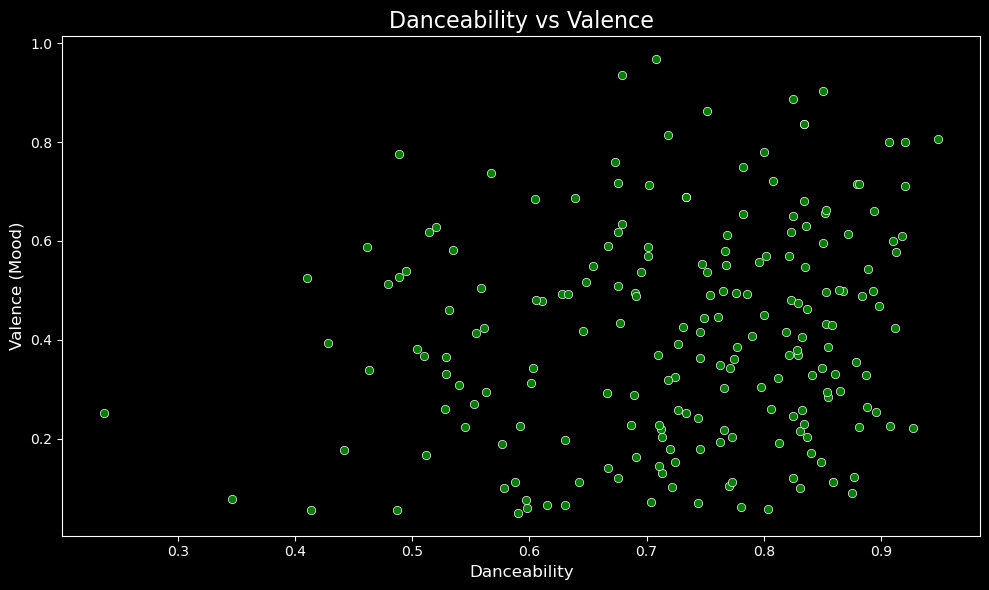

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=matched_df, x='danceability', y='valence', color='green')
plt.title('Danceability vs Valence', fontsize=16, color='white')
plt.xlabel('Danceability', fontsize=12, color='white')
plt.ylabel('Valence (Mood)', fontsize=12, color='white')
plt.tick_params(colors='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


In [71]:
from sklearn.metrics.pairwise import cosine_similarity


# Kullanıcının playlistindeki şarkılarla eşleşmiş özellikli veri
user_playlist_features = matched_df[matched_df['track_id'].isin(df_features['track_id'])]

# Playlist'in ortalama audio feature profilini al
playlist_avg_features = user_playlist_features[[
    'danceability', 'energy', 'key', 'loudness', 'mode', 
    'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo'
]].mean().values.reshape(1, -1)

# Tüm Kaggle verisini al, önerilecek şarkılar için
# Playlist'te zaten olan şarkıları filtrele
recommendation_pool = kaggle_df[~kaggle_df['track_id'].isin(df_features['track_id'])].copy()

# Benzerlik için kullanılacak feature'ları ayır
feature_cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                'speechiness', 'acousticness', 'instrumentalness', 
                'liveness', 'valence', 'tempo']

# Cosine similarity hesapla
similarities = cosine_similarity(playlist_avg_features, recommendation_pool[feature_cols])

# En benzer 10 şarkıyı al
recommendation_pool['similarity'] = similarities[0]
top_10_recommendations = recommendation_pool.sort_values(by='similarity', ascending=False).head(10)

# Sadece şarkı adı ve sanatçıyı göster
top_10_recommendations[['track_name', 'artist_name', 'similarity']]



,track_name,artist_name,similarity
1077731,Deh Pon Mi Mind [Rude Bwoy Remix],Shabba Ranks,0.999995
764041,Victim,Freddie McGregor,0.999995
932696,Sarakinos,Michalis Nikoloudis,0.999995
495030,I Chose Violence,iamjakehill,0.999995
125306,Can't Stand It,Mungo's Hi Fi,0.999994
202927,Rage Quit,Josh A,0.999994
429523,cool with it,brb.,0.999994
782978,Galavar Khali,Swapnil Bandodkar,0.999994
805703,Feel The Spirit,Clinton Fearon,0.999994
630541,Let Me Hold You (feat. Omarion),Bow Wow,0.999994
